# Exercises Chapter 4 "Classification"

In [53]:
import numpy as np
import pandas as pd;
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
from ISLP import load_data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Exercise #13
This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.
1. Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?
2. Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?
3. Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.
4. Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).
5. Repeat (4) using LDA.
6. Repeat (4) using QDA.
7. Repeat (4) using KNN with K = 1.
8. Repeat (4) using naive Bayes.
9. Which of these methods appears to provide the best results on
this data?
10. Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [2]:
Weekly = load_data('Weekly')

### Task 13.1

- The scatterplot suggests, that there is only a correlation between Volume and Year. It looks like a non-linear positive relationship. Maybe exponential, which is also supported by the correlation matrix (0.841)
- the Plot for 'Volume' also shows that it has increased over time (except a dive in the end)

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
Overview
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.40

<Axes: >

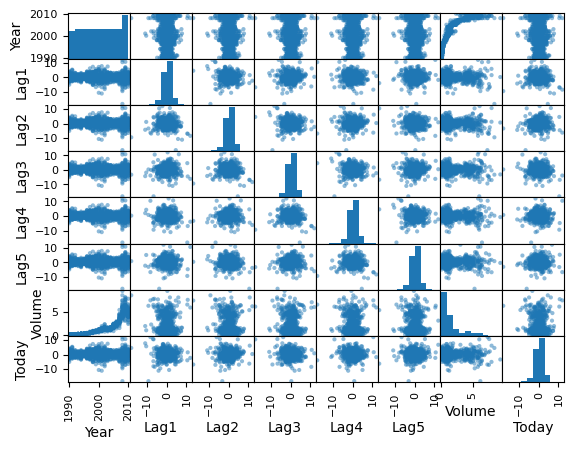

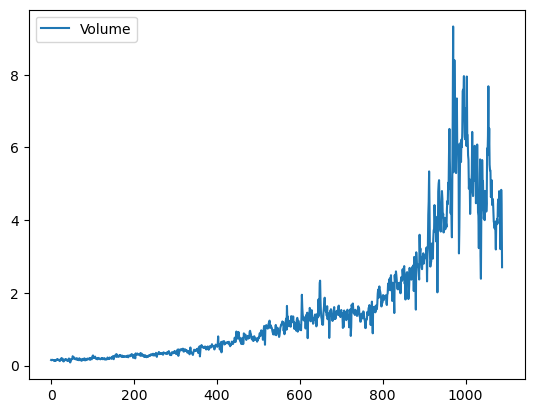

In [3]:
print(Weekly.head())
print('\033[1mOverview\033[0m')
print(Weekly.describe())
print('\033[1mCorrelation Matrix\033[0m')
print(Weekly.corr(numeric_only=True))
pd.plotting.scatter_matrix(Weekly)
Weekly.plot(y='Volume')

### Task 13.2

- The only significant Coefficient seems to be that of Lag2:0.0584. 

In [4]:
X = Weekly.drop(columns=['Today', 'Direction', 'Year'])
X = sm.add_constant(X)
y = Weekly['Direction'] == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Mon, 24 Mar 2025   Deviance:                       1486.4
Time:                        14:03:04   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.0

### Task 13.3

- Accuracy: 0.561 of our predictions are correct, which is only slightly higher than 50% a random prediction rate
- Positive pred rate:  0.906 of predictions were positive
- Positive Actual Rate:  0.555 of actual directions were positive (UP)
- Precision/Positive prediction value:  0.564 of positive predictions (direction being UP) are actually correct
- Negative prediction value:  0.529 of negative predictions(direction being DOWN) are actually correct
- Sensitivity/Recall 0.920 of actual UP directions were correctly identified
- Specificity/True positive rate:  0.111 of actual DOWN directions were correctly identified
- False positive rate / Type I error:  0.888 of actual DOWN directions were wrongly identified as UP
- False negative rate / Type II error:  0.079 of actual UP directions were wrongly identified as DOWN

Overall the confusion matrix shows that there is a clear bias towards positive predictions (UP directions) 96%, even though the actual positive rate is only 55.6%. With this threshold we seem to control for the Type II error (False negative rate 7.9%). Only 7.9% of of actual UP directions were wrongly identified as DOWN. We still are above the significance level of 5% though. So the threshold would have to be adjusted downwards to achieve that. On the contrary if we wanted to control for Type II error the threshhold has to go UP. E.g. a threshholf of  0.55 seems to achieve some kind of balanced outcome:

- Accuracy: 0.5426997245179064
- Positive pred rate:  0.5684113865932048
- Positive Actual Rate:  0.5555555555555556
- Precision/Positive prediction value:  0.5864297253634895
- Negative prediction value:  0.4851063829787234
- Sensitivity/Recall 0.6
- Specificity/True positive rate:  0.47107438016528924
- False positive rate / Type I error:  0.5289256198347108
- False negative rate / Type II error:  0.4

Accuracy: 0.5610651974288338
Positive pred rate:  0.90633608815427
Positive Actual Rate:  0.5555555555555556
Precision/Positive prediction value:  0.5643363728470111
Negative prediction value:  0.5294117647058824
Sensitivity/Recall 0.9206611570247933
Specificity/True positive rate:  0.1115702479338843
False positive rate / Type I error:  0.8884297520661157
False negative rate / Type II error:  0.07933884297520662


<Figure size 600x500 with 0 Axes>

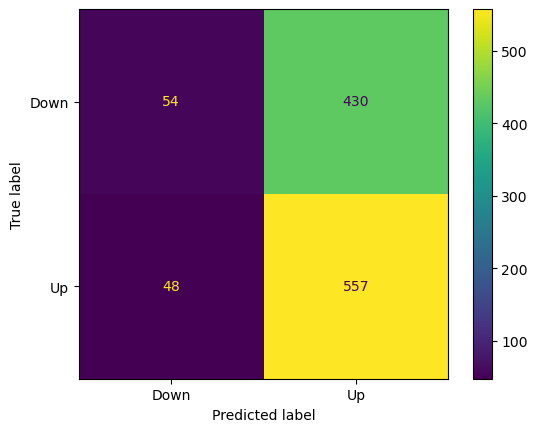

In [5]:
y_pred = results.predict() > 0.5

def confusion_analysis(cm,dlabels):
    plt.figure(figsize=(6, 5))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dlabels)
    disp.plot()
    TN =cm[0,0]
    FN = cm[1,0]
    TP = cm[1,1]
    FP = cm[0,1]
    Total = np.sum(cm)

    print('Accuracy:', (TN + TP)/Total)
    print('Positive pred rate: ', (TP + FP)/Total)
    print('Positive Actual Rate: ',(TP + FN)/Total )
    print('Precision/Positive prediction value: ', (TP)/(TP+FP))
    print('Negative prediction value: ', TN/(FN + TN))
    print('Sensitivity/Recall', (TP)/(TP+FN))
    print('Specificity/True positive rate: ', (TN)/(FP + TN))
    print('False positive rate / Type I error: ', (FP)/(FP + TN))
    print('False negative rate / Type II error: ', (FN)/(FN + TP))

cm = confusion_matrix(y, y_pred)
dlabels= ['Down','Up']
confusion_analysis(cm,dlabels)

### Task 13.4

Comparing the results from the training data with the results from test data, we see an increase in accuracy. Which is a bit surprising and should be further investigated! Type I error has improved  and Type II has worsened.So depending on which error we control for (not wanting to falsely predict Up or not wanting to falsely predict DOWN) this is either positive or negative. But overall I would that we can still perceive similar tendencies and would therefor declare the model as relatively robust

Traindata
Accuracy: 0.5553299492385787
Positive pred rate:  0.9563451776649746
Positive Actual Rate:  0.5522842639593909
Precision/Positive prediction value:  0.5562632696390658
Negative prediction value:  0.5348837209302325
Sensitivity/Recall 0.9632352941176471
Specificity/True positive rate:  0.05215419501133787
False positive rate / Type I error:  0.9478458049886621
False negative rate / Type II error:  0.03676470588235294
Testdata
Accuracy: 0.625
Positive pred rate:  0.8653846153846154
Positive Actual Rate:  0.5865384615384616
Precision/Positive prediction value:  0.6222222222222222
Negative prediction value:  0.6428571428571429
Sensitivity/Recall 0.9180327868852459
Specificity/True positive rate:  0.20930232558139536
False positive rate / Type I error:  0.7906976744186046
False negative rate / Type II error:  0.08196721311475409


<Figure size 600x500 with 0 Axes>

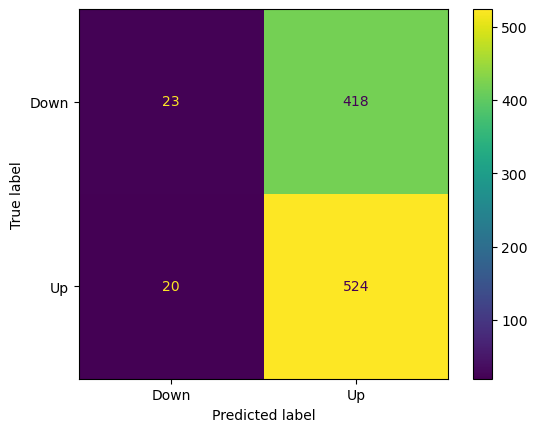

<Figure size 600x500 with 0 Axes>

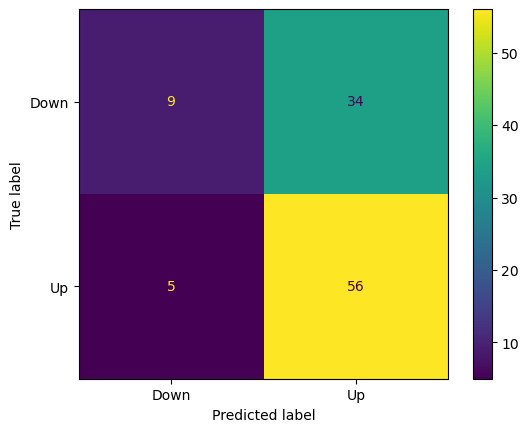

In [6]:
train = Weekly.Year < 2009
X = Weekly['Lag2']
X = sm.add_constant(X)
y = Weekly['Direction'] == 'Up'

X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict()
probs_test = results.predict(exog=X_test)
y_pred_test = probs_test > 0.5
y_pred = probs > 0.5
print('Traindata')
confusion_analysis(confusion_matrix(y_train, y_pred),['Down','Up'])
print('Testdata')
confusion_analysis(confusion_matrix(y_test, y_pred_test),['Down','Up'])

### Task 13.4* Extra

I have run the same task again, but now randomly pick the test data (independent from time) from the dataset. And now we actually have a decrease in accuracy, as was expected. Which suggests that we had a problem here with temporal dependence. Also it seems that now we only have an improvement in Error Type II. So this model proves even more robust now.

Traindata
Accuracy: 0.5535353535353535
Positive pred rate:  0.9
Positive Actual Rate:  0.5525252525252525
Precision/Positive prediction value:  0.5589225589225589
Negative prediction value:  0.5050505050505051
Sensitivity/Recall 0.9104204753199269
Specificity/True positive rate:  0.11286681715575621
False positive rate / Type I error:  0.8871331828442438
False negative rate / Type II error:  0.08957952468007313
Testdata
Accuracy: 0.5858585858585859
Positive pred rate:  0.898989898989899
Positive Actual Rate:  0.5858585858585859
Precision/Positive prediction value:  0.5955056179775281
Negative prediction value:  0.5
Sensitivity/Recall 0.9137931034482759
Specificity/True positive rate:  0.12195121951219512
False positive rate / Type I error:  0.8780487804878049
False negative rate / Type II error:  0.08620689655172414


<Figure size 600x500 with 0 Axes>

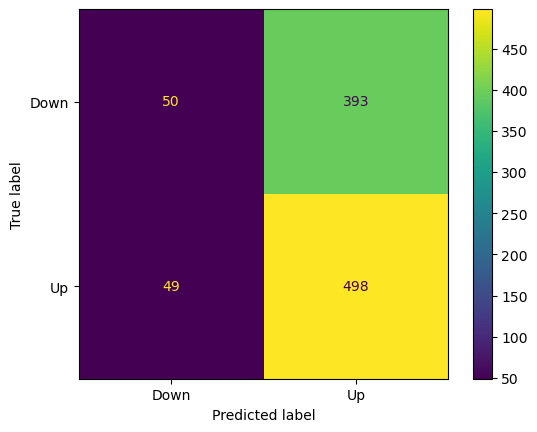

<Figure size 600x500 with 0 Axes>

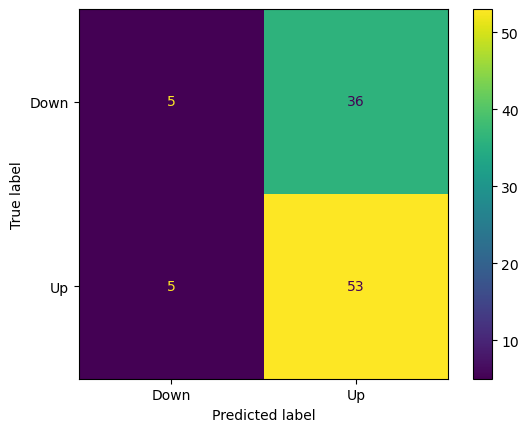

In [7]:
X = Weekly[['Lag1','Lag2','Lag3']]
X = sm.add_constant(X)
y = Weekly['Direction'] == 'Up'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.09,  
    random_state=42 
)

glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict()
probs_test = results.predict(exog=X_test)
y_pred_test = probs_test > 0.5
y_pred = probs > 0.5
print('Traindata')
confusion_analysis(confusion_matrix(y_train, y_pred),['Down','Up'])
print('Testdata')
confusion_analysis(confusion_matrix(y_test, y_pred_test),['Down','Up'])


### Task 13.5 LDA

I have implemented this now with the same random selection method as in 13.4*

Traindata
Accuracy: 0.5535353535353535
Positive pred rate:  0.9040404040404041
Positive Actual Rate:  0.5525252525252525
Precision/Positive prediction value:  0.5586592178770949
Negative prediction value:  0.5052631578947369
Sensitivity/Recall 0.9140767824497258
Specificity/True positive rate:  0.10835214446952596
False positive rate / Type I error:  0.891647855530474
False negative rate / Type II error:  0.08592321755027423
Testdata
Accuracy: 0.5858585858585859
Positive pred rate:  0.898989898989899
Positive Actual Rate:  0.5858585858585859
Precision/Positive prediction value:  0.5955056179775281
Negative prediction value:  0.5
Sensitivity/Recall 0.9137931034482759
Specificity/True positive rate:  0.12195121951219512
False positive rate / Type I error:  0.8780487804878049
False negative rate / Type II error:  0.08620689655172414


<Figure size 600x500 with 0 Axes>

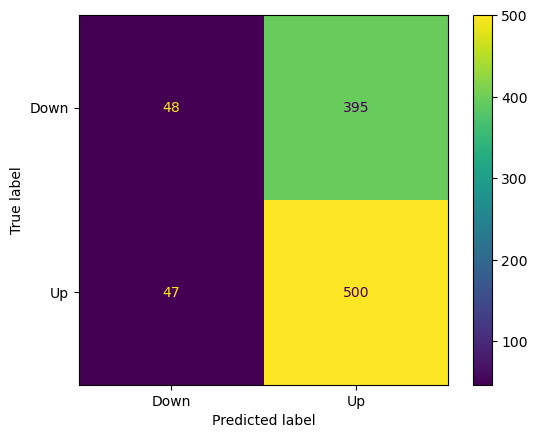

<Figure size 600x500 with 0 Axes>

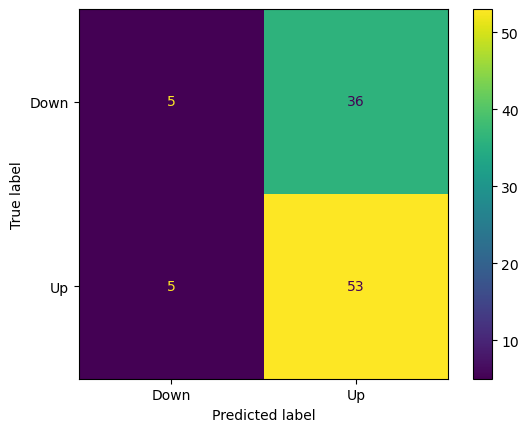

In [8]:
X = Weekly[['Lag1','Lag2','Lag3']]
X = sm.add_constant(X)

y = Weekly['Direction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.09,  
    random_state=42 
)

lda = LDA(store_covariance=True)

lda.fit(X_train, y_train)

y_pred_test = lda.predict(X_test)
y_pred = lda.predict(X_train)
print('Traindata')
confusion_analysis(confusion_matrix(y_train, y_pred),['Down','Up'])
print('Testdata')
confusion_analysis(confusion_matrix(y_test, y_pred_test),['Down','Up'])

### Task 13.6

Here I had to add more Predictors for the Model to start working at all and set QDA(store_covariance=True, reg_param=0.2, priors=[0.5, 0.5]) Which fixes the priors (before it was very heavily biased towards the 'UP' class)


Traindata
Accuracy: 0.5070707070707071
Positive pred rate:  0.37676767676767675
Positive Actual Rate:  0.5525252525252525
Precision/Positive prediction value:  0.579088471849866
Negative prediction value:  0.46353322528363045
Sensitivity/Recall 0.39488117001828155
Specificity/True positive rate:  0.6455981941309256
False positive rate / Type I error:  0.3544018058690745
False negative rate / Type II error:  0.6051188299817185
Testdata
Accuracy: 0.5353535353535354
Positive pred rate:  0.42424242424242425
Positive Actual Rate:  0.5858585858585859
Precision/Positive prediction value:  0.6428571428571429
Negative prediction value:  0.45614035087719296
Sensitivity/Recall 0.46551724137931033
Specificity/True positive rate:  0.6341463414634146
False positive rate / Type I error:  0.36585365853658536
False negative rate / Type II error:  0.5344827586206896


<Figure size 600x500 with 0 Axes>

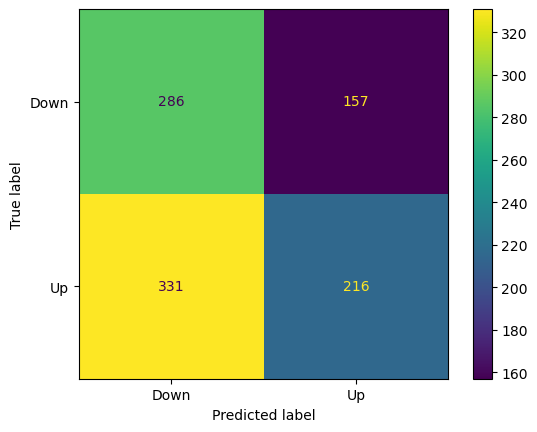

<Figure size 600x500 with 0 Axes>

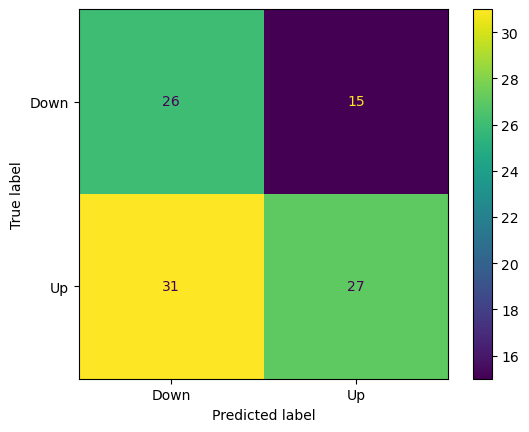

In [9]:
X = Weekly[['Lag2','Lag1','Lag3']]
X = sm.add_constant(X)

y = Weekly['Direction']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.09,  
    random_state=42 
)

qda = QDA(store_covariance=True, reg_param=0.2, priors=[0.5, 0.5])

qda.fit(X_train, y_train)

y_pred_test = qda.predict(X_test)
y_pred = qda.predict(X_train)
print('Traindata')
confusion_analysis(confusion_matrix(y_train, y_pred),['Down','Up'])
print('Testdata')
confusion_analysis(confusion_matrix(y_test, y_pred_test),['Down','Up'])

### Task 13.7
For N= 1, this is an obvious case of overfitting - Trainingdata accuracy of 96% and Testdata of 48%
With N=100 we achieve a better balance (55% / 56%)

Traindata
Accuracy: 0.5646464646464646
Positive pred rate:  0.7515151515151515
Positive Actual Rate:  0.5525252525252525
Precision/Positive prediction value:  0.5779569892473119
Negative prediction value:  0.524390243902439
Sensitivity/Recall 0.7861060329067642
Specificity/True positive rate:  0.291196388261851
False positive rate / Type I error:  0.708803611738149
False negative rate / Type II error:  0.21389396709323583
Testdata
Accuracy: 0.5757575757575758
Positive pred rate:  0.7676767676767676
Positive Actual Rate:  0.5858585858585859
Precision/Positive prediction value:  0.6052631578947368
Negative prediction value:  0.4782608695652174
Sensitivity/Recall 0.7931034482758621
Specificity/True positive rate:  0.2682926829268293
False positive rate / Type I error:  0.7317073170731707
False negative rate / Type II error:  0.20689655172413793


<Figure size 600x500 with 0 Axes>

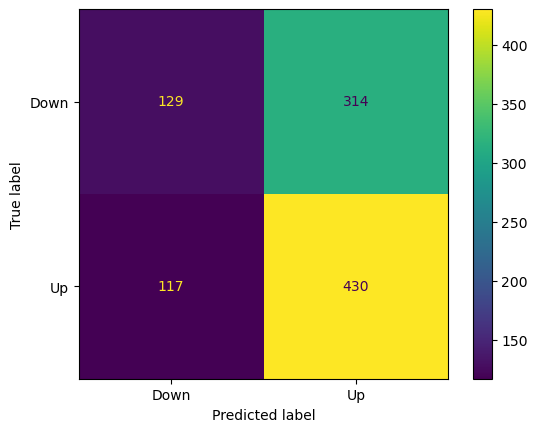

<Figure size 600x500 with 0 Axes>

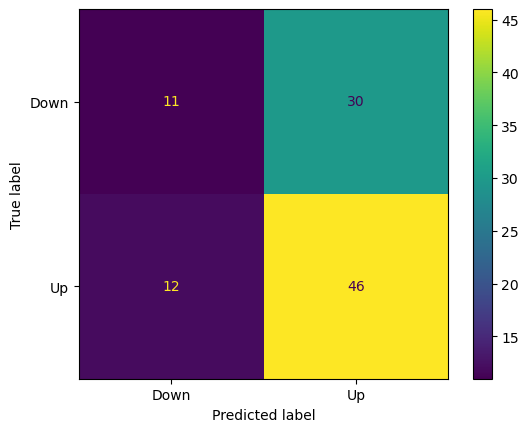

In [10]:
knn1 = KNeighborsClassifier(n_neighbors=100)
X = Weekly[['Lag1','Lag2','Lag3']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.09,  
    random_state=42 
)
knn1.fit(X_train, y_train)

y_pred_test = knn1.predict(X_test)
y_pred = knn1.predict(X_train)
print('Traindata')
confusion_analysis(confusion_matrix(y_train, y_pred),['Down','Up'])
print('Testdata')
confusion_analysis(confusion_matrix(y_test, y_pred_test),['Down','Up'])

### Task 13.8

Traindata
Accuracy: 0.5494949494949495
Positive pred rate:  0.7888888888888889
Positive Actual Rate:  0.5525252525252525
Precision/Positive prediction value:  0.5646606914212549
Negative prediction value:  0.49282296650717705
Sensitivity/Recall 0.8062157221206582
Specificity/True positive rate:  0.2325056433408578
False positive rate / Type I error:  0.7674943566591422
False negative rate / Type II error:  0.19378427787934185
Testdata
Accuracy: 0.5757575757575758
Positive pred rate:  0.8282828282828283
Positive Actual Rate:  0.5858585858585859
Precision/Positive prediction value:  0.5975609756097561
Negative prediction value:  0.47058823529411764
Sensitivity/Recall 0.8448275862068966
Specificity/True positive rate:  0.1951219512195122
False positive rate / Type I error:  0.8048780487804879
False negative rate / Type II error:  0.15517241379310345


<Figure size 600x500 with 0 Axes>

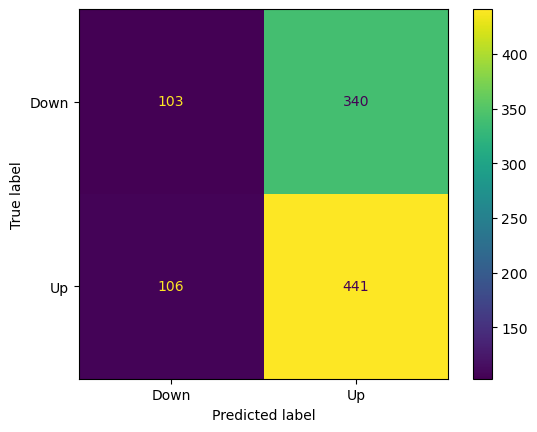

<Figure size 600x500 with 0 Axes>

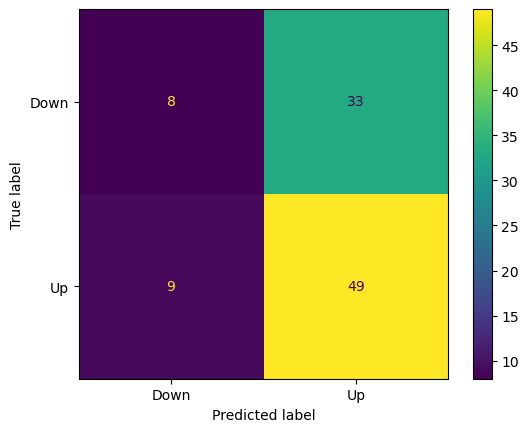

In [11]:
NB = GaussianNB()
NB.fit(X_train, y_train)

y_pred_test = NB.predict(X_test)
y_pred = NB.predict(X_train)
print('Traindata')
confusion_analysis(confusion_matrix(y_train, y_pred),['Down','Up'])
print('Testdata')
confusion_analysis(confusion_matrix(y_test, y_pred_test),['Down','Up'])

### Task 13.9

I would say, that none of the models in their current state are good (even with the tiny adaptations I have done already - not taking KNN K=100 not into account. Overall several of the models overly predict Up. And even those where up and down in total are more accurately predicted (true up is 56%), the accuracy is still rather low. Overall I would say that in their current state QDA has the best predictions, even though it overly predicts false negatives.

### Task 13.10

1. Overall Predictive Performance is Modest
Across all models, the best accuracy achieved is approximately 62%, which is not bad taking the Efficient Market Hypothesis into account.

Conclusion:
Predicting market direction based solely on lagged returns and volume is inherently difficult due to market efficiency and noise.

2. Non-Linear Effects Provide Limited Gains
Adding non-linear terms (like Lag1 * Lag2 and Lag1_squared) yields mixed results:

Sometimes improves logistic regression and LDA performance.
Causes QDA to perform worse, likely due to overfitting on limited data.
Conclusion:
There may be weak non-linear patterns, but excessive model flexibility hurts performance. Simpler linear models often generalize better.

3.log(Volume) Add Value
Including log(Volume) improves performance in LDA.
This indicates that trading volume contains useful information about market direction.
Conclusion:
Changes in market participation, captured by volume, are weakly predictive of directional moves.

4. KNN Suggests feature combinations matter more
KNN's performance peaks at mid-level K — potential benefit from generalization, not local overfitting.
Non-linearity exists, but not necessarily in the form of local relationships.
Feature combinations matter more than K sensitivity here.

5. LDA Outperforms QDA
LDA consistently achieves better accuracy.
QDA suffers, likely due to small sample size and high variance in estimating quadratic terms.
Conclusion:
Linear relationships dominate. Complex models like QDA may not be suitable given the dataset size and predictor strength.



In [12]:

X = Weekly[['Lag1','Lag2','Lag3','Volume']].copy()

X['log(Volume)'] = np.log(X['Volume'])
X['Lag1_squared'] = X['Lag1']**2
X['Lag1_Lag2'] = X['Lag1'] * X['Lag2']
X['Lag1_Volume'] = X['Lag1'] * X['Volume']

predictor_sets = [
    ['Lag1', 'Lag2'],
    ['Lag1', 'Lag2', 'Volume'],
    ['Lag1', 'Lag2', 'log(Volume)'],
    ['Lag1', 'Lag2', 'log(Volume)','Lag1_Lag2'],
    ['Lag1','Lag2','Lag1_squared', 'Lag1_Lag2'],
    ['Lag1','Volume','Lag1_Volume']
]

models = ['Logistic Regression',
         'LDA',
         'QDA',
         'KNN',
         'Naive Bayes']
ks = [1,5,9,20,50,100]

y = Weekly['Direction'] == 'Up'
X = sm.add_constant(X)
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
results = []

def get_model(name,**kwargs):
    if name == 'Logistic Regression':
        return sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
    elif name == 'LDA':
        return LDA(store_covariance=True)
    elif name == 'QDA':
        return QDA(store_covariance=True, reg_param=0.2, priors=[0.5, 0.5])
    elif name == 'KNN':
        return KNeighborsClassifier(n_neighbors=k)
    elif name == 'Naive Bayes':
        return GaussianNB()

for modelname in models:

    for predictors in predictor_sets:
        k_used = '-'
        X_subset = X[predictors]
        X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y, 
        test_size=0.09,  
        random_state=42 
        )

        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        

        if modelname == 'KNN':
            for k in ks:
                model = get_model(modelname,k=k)
                res = model.fit(X_train, y_train)
                y_pred_test = res.predict(X_test)
                y_pred = res.predict(X_train)
                cm = confusion_matrix(y_test, y_pred_test)
                cm_values = cm.ravel() 

                results.append({
                "Predictors": ', '.join(predictors),
                "Model": modelname,
                "K": k,  # Since we're not using KNN here
                "Confusion Matrix": cm_values,
                "Accuracy": (cm[0, 0] + cm[1, 1]) / cm.sum()
                })
        else :
            if modelname == 'Logistic Regression':
                model = get_model(modelname, y_train=y_train, X_train=X_train)
                res = model.fit()
                probs = res.predict()
                probs_test = res.predict(exog=X_test)
                y_pred_test = probs_test > 0.5
                y_pred = probs > 0.5
            else :
                model = get_model(modelname)
                res = model.fit(X_train, y_train)
                y_pred_test = res.predict(X_test)
                y_pred = res.predict(X_train)
    


            cm = confusion_matrix(y_test, y_pred_test)
            cm_values = cm.ravel() 

            results.append({
            "Predictors": ', '.join(predictors),
            "Model": modelname,
            "K": '-', 
            "Confusion Matrix": cm_values,
            "Accuracy": (cm[0, 0] + cm[1, 1]) / cm.sum()
            })
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
results_df = pd.DataFrame(results)

def modelColor(column):
    colors = {
        "Logistic Regression": "background-color: yellow",
        "LDA": "background-color: lightblue",
        "QDA": "background-color: orange",
        "KNN": "background-color: lightgreen",
        "Naive Bayes": "background-color: violet"
    }
    return column.map(lambda value: colors.get(value,""))
        

results_df.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Greens', subset=['Accuracy']).apply(modelColor,subset=['Model'])




,Predictors,Model,K,Confusion Matrix,Accuracy
9,"Lag1, Lag2, log(Volume), Lag1_Lag2",LDA,-,[ 8 33 4 54],0.626263
52,"Lag1, Volume, Lag1_Volume",KNN,50,[20 21 16 42],0.626263
8,"Lag1, Lag2, log(Volume)",LDA,-,[ 8 33 4 54],0.626263
54,"Lag1, Lag2",Naive Bayes,-,[ 7 34 4 54],0.616162
39,"Lag1, Lag2, log(Volume), Lag1_Lag2",KNN,20,[23 18 20 38],0.616162
35,"Lag1, Lag2, log(Volume)",KNN,100,[15 26 13 45],0.606061
55,"Lag1, Lag2, Volume",Naive Bayes,-,[ 8 33 6 52],0.606061
7,"Lag1, Lag2, Volume",LDA,-,[ 7 34 5 53],0.606061
10,"Lag1, Lag2, Lag1_squared, Lag1_Lag2",LDA,-,[ 7 34 5 53],0.606061
24,"Lag1, Lag2, Volume",KNN,1,[25 16 24 34],0.595960


## Exercise 14

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.
1. Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:
Auto['mpg01'] = mpg01
2. Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.
3. Split the data into a training set and a test set.
4. Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(2). What is the test error of the model obtained?
5. Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(2). What is the test error of the model obtained?
6. Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (2). What is the test error of the model obtained?
7. Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (2). What is the test error of the model obtained?
8. Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (2). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

### Task 14.1


In [13]:
Auto = load_data('Auto')
median = Auto['mpg'].median()
Auto['mpg01'] = (Auto['mpg'] > median).astype(int)

Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2,1
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,1


### Task 14.2

1. The scatterplot suggests a relation between displacement, horsepower, weight, accelaration with mpg01. As one can distinguish the two classes of mpg01 in those features, sicne they form distinct clusters.
2. The boxplots make it clear that of those the weakest feature is acceleration, since their interquartile ranges overlap

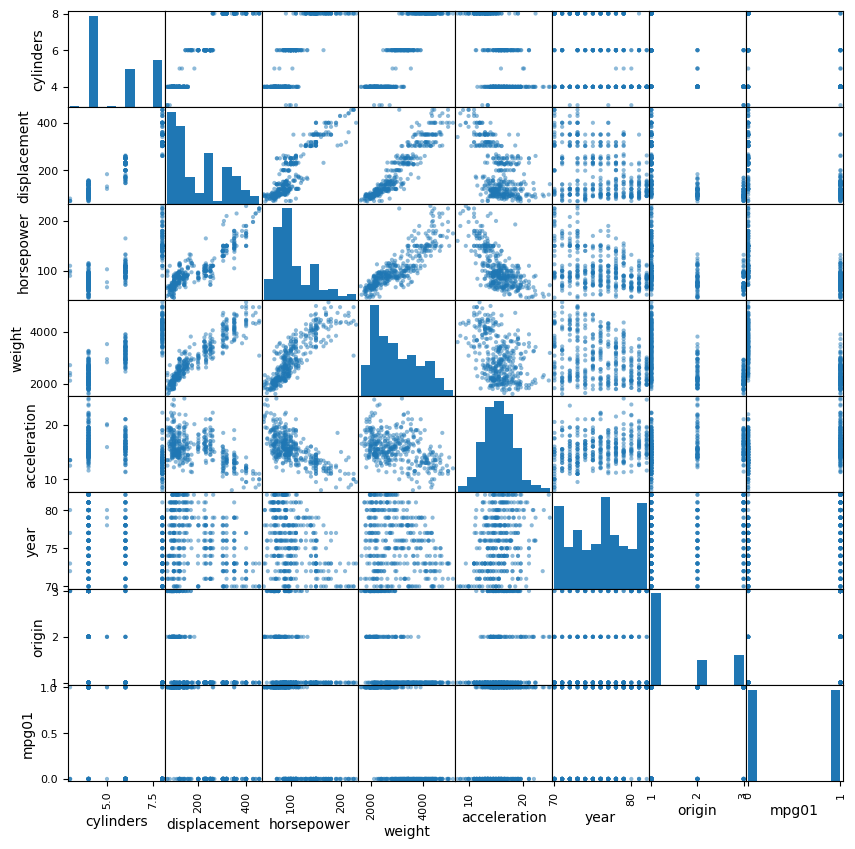

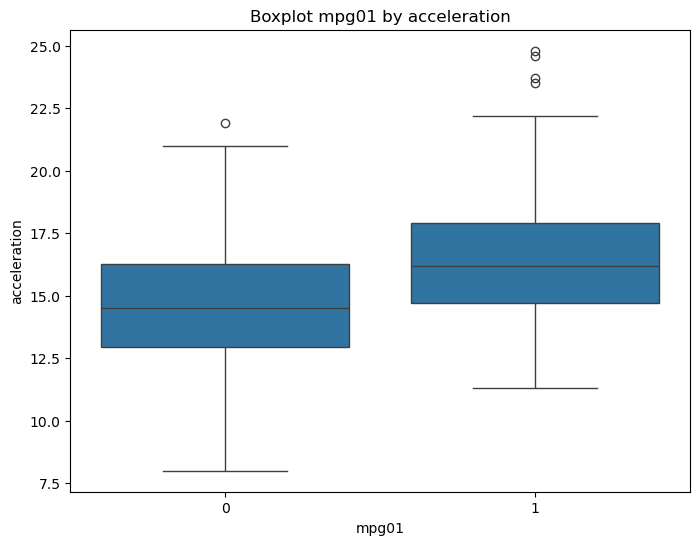

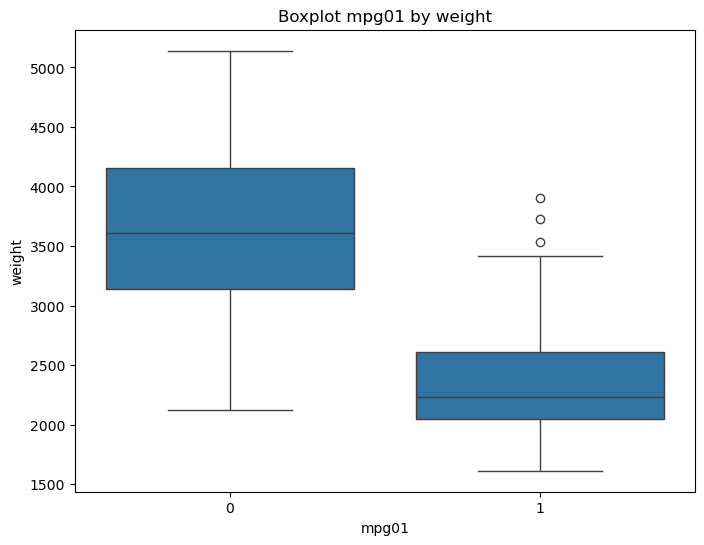

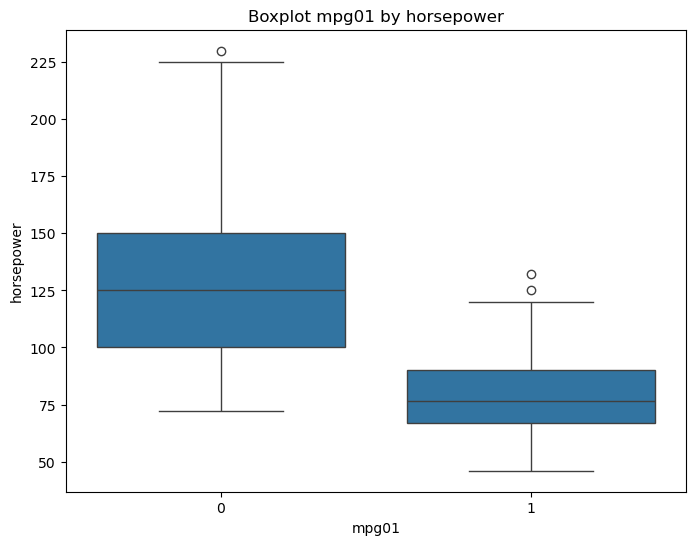

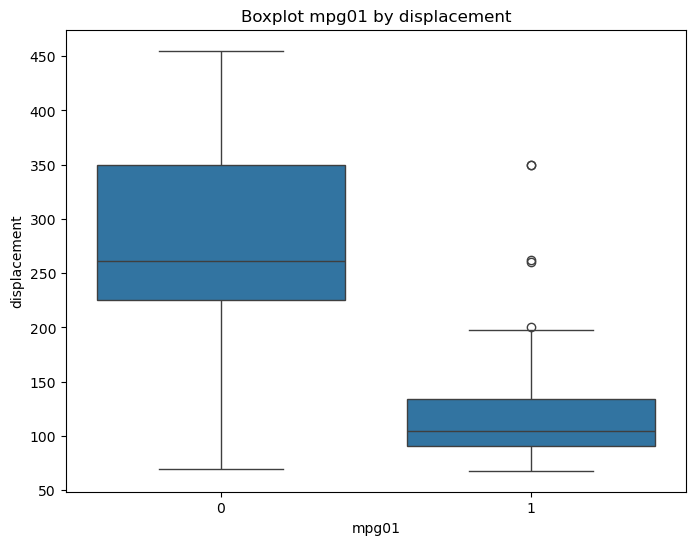

In [14]:

pd.plotting.scatter_matrix(Auto.drop(columns=['mpg']), figsize=(10, 10), diagonal='hist')

# Show the plot
plt.show()

features = ['acceleration', 'weight', 'horsepower', 'displacement']

for feature in features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='mpg01', y=feature,data=Auto)
    plt.title('Boxplot mpg01 by ' + feature)
    plt.show()


### Task 14.3

In [15]:
X = Auto[features]
y = Auto['mpg01']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.09,random_state=42)


### Task 14.4
The test accuracy of the LDA model is 59% and the test error is thereby 41%

In [16]:
model = LDA(store_covariance=True)
results = model.fit(X_train,y_train)
y_pred = results.predict(X_train)
y_pred_test = results.predict(X_test)

cm = confusion_matrix(y_test,y_pred_test)
cm_values = cm.ravel()

print('Confusion Matrix: ' + str(cm_values))
print('Accuracy: ' + str((cm[0,0] + cm[1,1])/cm.sum()))


Confusion Matrix: [11  6  0 19]
Accuracy: 0.8333333333333334


### Task 14.5

The test accuracy of the LDA model is 45% and the test error is thereby 55%

In [17]:
model = QDA(store_covariance=True)
results = model.fit(X_train,y_train)
y_pred = results.predict(X_train)
y_pred_test = results.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
cm_values = cm.ravel()

print('Confusion Matrix: ' + str(cm_values))
print('Accuracy: ' + str((cm[0,0] + cm[1,1])/cm.sum()))

Confusion Matrix: [13  4  0 19]
Accuracy: 0.8888888888888888


### Task 14.6
The test accuracy of the Logistic Regression is 55% and test is therefor 45%

In [18]:
model = sm.GLM(y_train,X_train,family = sm.families.Binomial())
results = model.fit()
y_prob = results.predict()
y_prob_test = results.predict(exog=X_test)
y_pred = y_prob > 0.5
y_pred_test = y_prob_test > 0.5

cm = confusion_matrix(y_test, y_pred_test)
cm_values = cm.ravel()

print('Confusion Matrix: ' + str(cm_values))
print('Accuracy: ' + str((cm[0,0] + cm[1,1])/cm.sum()))

Confusion Matrix: [13  4  0 19]
Accuracy: 0.8888888888888888


### Task 14.7
The test accuracy of the Naive Bayes is 53% and test error is therefore 47%

In [19]:
model = GaussianNB()
results = model.fit(X_train,y_train)
y_pred = results.predict(X_train)
y_pred_test = results.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
cm_values = cm.ravel()

print('Confusion Matrix: ' + str(cm_values))
print('Accuracy: ' + str((cm[0,0] + cm[1,1])/cm.sum()))


Confusion Matrix: [12  5  0 19]
Accuracy: 0.8611111111111112


### Task 14.8

I found those results a bit confusing: The highest accuracy is reached k=7 - 63%. Afterwards it dips down to 56% (at k=13) but then rises again until it reaches its second high at k=25, 61%. In both cases the higher accuracy is due to a dip in Type I error

In [20]:
for k in range(1,30,2):
    model = KNeighborsClassifier(n_neighbors=k)
    results = model.fit(X_train, y_train)
    y_pred = results.predict(X_train)
    y_pred_test = results.predict(X_test)

    cm = confusion_matrix(y_test, y_pred_test)
    cm_values = cm.ravel()

    print(str(k) + '-NN')
    print('Confusion Matrix: ' + str(cm_values))
    print('Accuracy: ' + str((cm[0,0] + cm[1,1])/cm.sum()))
    print('False positive rate / Type I error: ', (cm[0,1])/(cm[0,1] + cm[0,0]))
    print('False negative rate / Type II error: ', (cm[1,0])/(cm[1,0] + cm[1,1]))

    

1-NN
Confusion Matrix: [14  3  1 18]
Accuracy: 0.8888888888888888
False positive rate / Type I error:  0.17647058823529413
False negative rate / Type II error:  0.05263157894736842
3-NN
Confusion Matrix: [13  4  0 19]
Accuracy: 0.8888888888888888
False positive rate / Type I error:  0.23529411764705882
False negative rate / Type II error:  0.0
5-NN
Confusion Matrix: [14  3  1 18]
Accuracy: 0.8888888888888888
False positive rate / Type I error:  0.17647058823529413
False negative rate / Type II error:  0.05263157894736842
7-NN
Confusion Matrix: [13  4  0 19]
Accuracy: 0.8888888888888888
False positive rate / Type I error:  0.23529411764705882
False negative rate / Type II error:  0.0
9-NN
Confusion Matrix: [13  4  0 19]
Accuracy: 0.8888888888888888
False positive rate / Type I error:  0.23529411764705882
False negative rate / Type II error:  0.0
11-NN
Confusion Matrix: [13  4  0 19]
Accuracy: 0.8888888888888888
False positive rate / Type I error:  0.23529411764705882
False negative rate

## Exercise 15

This problem involves writing functions.
1. Write a function, Power(), that prints out the result of raising 2
to the 3rd power. In other words, your function should compute
23 and print out the results.
Hint: Recall that x**a raises x to the power a. Use the print()
function to display the result.
2. Create a new function, Power2(), that allows you to pass any
two numbers, x and a, and prints out the value of x**a. You can
do this by beginning your function with the line
def Power2(x, a):
You should be able to call your function by entering, for instance,
Power2(3, 8)
on the command line. This should output the value of 38, namely,
6, 561.
3. Using the Power2() function that you just wrote, compute 103,
817, and 1313.
4. Now create a new function, Power3(), that actually returns the
result x**a as a Python object, rather than simply printing it
to the screen. That is, if you store the value x**a in an object
called result within your function, then you can simply return return this result, using the following line:
return result
Note that the line above should be the last line in your function,
and it should be indented 4 spaces.
5. Now using the Power3() function, create a plot of f(x) = x2.
The x-axis should display a range of integers from 1 to 10, and
the y-axis should display x2. Label the axes appropriately, and
use an appropriate title for the figure. Consider displaying either
the x-axis, the y-axis, or both on the log-scale. You can do this
by using the ax.set_xscale() and ax.set_yscale() methods of .set_xscale()
.set_yscale() the axes you are plotting to.

### Task 15.1/2/3

In [21]:
def Power2(x,a):
    print(x**a)
Power2(2,3)
Power2(10,2)
Power2(8,17)
Power2(131,3)

8
100
2251799813685248
2248091


### Task 15.4

In [22]:
def Power3(x,a):
    return x**a

### Task 15.5

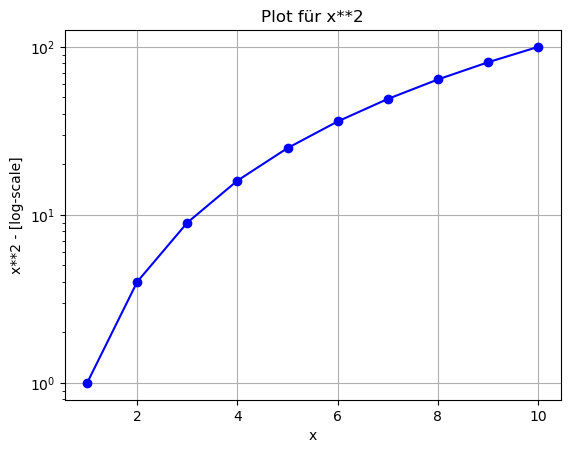

In [23]:
x = range(1,11)
y = [Power3(i,2) for i in x]
plt.plot(x,y,marker='o',linestyle='-',color='b')
plt.title('Plot für x**2')
plt.xlabel('x')
plt.ylabel('x**2 - [log-scale]')
plt.yscale('log')
plt.grid(True)
plt.show()

### Task 15.6

<function title at 0x000001CE3A213240>


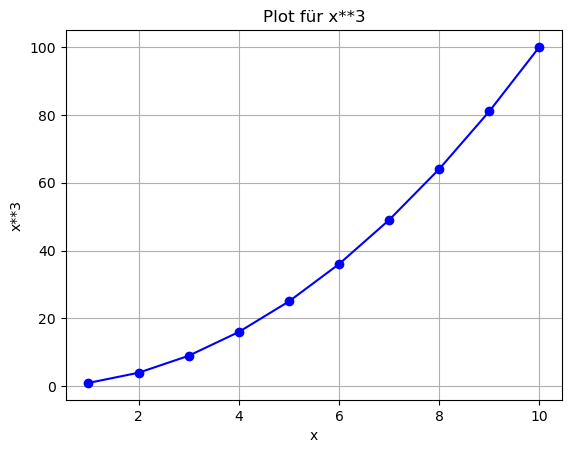

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def PlotPower(x,a):
    y = [Power3(i,2) for i in x]
    plt.plot(x,y,marker='o',linestyle='-',color='b')
    plt.title('Plot für x**' + str(a))
    plt.xlabel('x')
    plt.ylabel('x**' + str(a))
    plt.grid(True)
    plt.show()

print(plt.title)
PlotPower(np.arange(1,11),3)

## Exercise 16

Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, naive Bayes, and KNN models using
various subsets of the predictors. Describe your findings.
Hint: You will have to create the response variable yourself, using the
variables that are contained in the Boston data set.

Results:
1. The **scatterplot** suggests all features to possible have relevance. Certain feature pairs suggest very high correlation:
     - medv / lstat / rm
     - nox / age / dis
    There are more, but not as pronounced
2. The **boxplots** suggest clear seperation for the features nox, indus, age, dis, rad. The features lstat, medv, tax and ptratio have more overlap but, I will still take them into consideration. zn, rm I will not further consider as linear predictors
3. The **grouped boxplots** show that
   - zn does not split into bins (meaning all values being the same) - therefore I will drop it
   - rm as the scatterplot already indicated seperates clearly for medv and lstat -> I will introduce interaction terms here
   For the moderately correlated terms we get clear separation for
    - lstat: indus, nox, age, dis, tax, medv, rm 
    - medv: indus, nox, rm, age, dis, tax, ptratio, lstat
    - tax: indus, nox, age, dis, lstat, medv
    - ptratio: indus, lstat, medv
4. The **VIF analysis** show that rm, ptratio, nox, tax are the features with the highest collinearity to others. But other than zn we have mutlicollinearity problems with all

In [82]:
Boston = load_data('Boston')
median = Boston['crim'].median()
Boston['crim01'] = (Boston['crim'] > median).astype(int)

#pd.plotting.scatter_matrix(Boston.drop(columns=['crim']), figsize=(10, 10), diagonal='hist')

#plt.show()

features = ['zn', 'indus', 'nox', 'rm','age', 'dis', 'rad', 'tax','ptratio','lstat','medv']
'''
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='crim01', y=feature,data=Boston)
    plt.title('Boxplot crim01 by ' + feature)
    plt.show()
'''
features_red = ['tax','ptratio','lstat','medv']
'''
for lab1 in features_red:
    lab1_bin = lab1 + '_bin'
    bin_result = pd.qcut(Boston[lab1], q=3, duplicates='drop')
    n_bins = bin_result.cat.categories.size
    labels = ['Low', 'Medium', 'High'][:n_bins] 

    Boston[lab1_bin] = pd.qcut(Boston[lab1], q=3, labels=labels, duplicates='drop')
    for lab2 in features:
        if lab2 == lab1:
            continue
        plt.figure(figsize=(4,3)) 
        sns.boxplot(x=lab1_bin,y=lab2,data=Boston)
        plt.title('Boxplot '+ lab1 + ' vs ' + lab2)
        #plt.show()
'''       
print(features)
X_pred = add_constant(Boston[features])  # Add intercept
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

ks= [1,3,5,7,9,11,13,15]

X = Boston.drop(columns=['crim01'])
y = Boston['crim01']

X['rm_lstat']= X['rm'] * X['lstat']
X['rm_medv']= X['rm'] * X['medv']
X['indus_rm'] = X['indus']*X['rm']
X['nox_2']= X['nox']**2
X['log(nox)'] = np.log(X['nox'])
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.09,random_state=42)



predictor_sets = [
    [ 'nox', 'indus', 'age', 'dis', 'rad'],
]
results =[]

def get_model(name,**kwargs):
    if name == 'Logistic Regression':
        return sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
    elif name == 'LDA':
        return LDA(store_covariance=True)
    elif name == 'QDA':
        return QDA(store_covariance=True, reg_param=0.2, priors=[0.5, 0.5])
    elif name == 'KNN':
        return KNeighborsClassifier(n_neighbors=k)
    elif name == 'Naive Bayes':
        return GaussianNB()

for modelname in models:

    for predictors in predictor_sets:
        k_used = '-'
        X_subset = X[predictors]
        X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y, 
        test_size=0.15,  
        random_state=42 
        )

        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        

        if modelname == 'KNN':
            for k in ks:
                model = get_model(modelname,k=k)
                res = model.fit(X_train, y_train)
                y_pred_test = res.predict(X_test)
                y_pred = res.predict(X_train)
                cm = confusion_matrix(y_test, y_pred_test)
                cm_values = cm.ravel() 

                results.append({
                "Predictors": ', '.join(predictors),
                "Model": modelname,
                "K": k,  # Since we're not using KNN here
                "Confusion Matrix": cm_values,
                "Accuracy": (cm[0, 0] + cm[1, 1]) / cm.sum()
                })
        else :
            if modelname == 'Logistic Regression':
                model = get_model(modelname, y_train=y_train, X_train=X_train)
                res = model.fit()
                print(res.summary())
                probs = res.predict()
                probs_test = res.predict(exog=X_test)
                y_pred_test = probs_test > 0.57
                y_pred = probs > 0.57
            else :
                model = get_model(modelname)
                res = model.fit(X_train, y_train)
                y_pred_test = res.predict(X_test)
                y_pred = res.predict(X_train)
    


            cm = confusion_matrix(y_test, y_pred_test)
            cm_values = cm.ravel() 

            results.append({
            "Predictors": ', '.join(predictors),
            "Model": modelname,
            "K": '-', 
            "Confusion Matrix": cm_values,
            "Accuracy": (cm[0, 0] + cm[1, 1]) / cm.sum()
            })
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
results_df = pd.DataFrame(results)

def modelColor(column):
    colors = {
        "Logistic Regression": "background-color: yellow",
        "LDA": "background-color: lightblue",
        "QDA": "background-color: orange",
        "KNN": "background-color: lightgreen",
        "Naive Bayes": "background-color: violet"
    }
    return column.map(lambda value: colors.get(value,""))
        

results_df.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Greens', subset=['Accuracy']).apply(modelColor,subset=['Model'])




['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
     feature          VIF
0       crim     2.268686
1         zn     3.281567
2      indus   545.826770
3       chas     1.248076
4        nox  3795.581844
5         rm  3017.296098
6        age    24.154391
7        dis    22.149726
8        rad    17.618194
9        tax    63.801992
10   ptratio   152.823206
11     lstat   569.562318
12      medv   924.339007
13  rm_lstat   570.280569
14   rm_medv   937.918012
15  indus_rm   492.723746
16     nox_2   766.188843
17  log(nox)   548.489778
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 crim01   No. Observations:                  430
Model:                            GLM   Df Residuals:                      425
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                   

,Predictors,Model,K,Confusion Matrix,Accuracy
3,"nox, indus, age, dis, rad",KNN,1,[41 1 4 30],0.934211
4,"nox, indus, age, dis, rad",KNN,3,[41 1 5 29],0.921053
6,"nox, indus, age, dis, rad",KNN,7,[41 1 5 29],0.921053
7,"nox, indus, age, dis, rad",KNN,9,[41 1 5 29],0.921053
8,"nox, indus, age, dis, rad",KNN,11,[41 1 5 29],0.921053
10,"nox, indus, age, dis, rad",KNN,15,[41 1 5 29],0.921053
5,"nox, indus, age, dis, rad",KNN,5,[40 2 5 29],0.907895
9,"nox, indus, age, dis, rad",KNN,13,[40 2 5 29],0.907895
0,"nox, indus, age, dis, rad",Logistic Regression,-,[41 1 9 25],0.868421
1,"nox, indus, age, dis, rad",LDA,-,[38 4 9 25],0.828947
